# EDA Analysis

## Importing Libs

In [3]:
# Importing Libs
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px


sns.set_theme(style="darkgrid", rc={'figure.figsize':(10,6)})

## Getting the DataFrame

In [5]:
FRAUD_PATH = "datasets/AIML Dataset.csv"

df = pd.read_csv(FRAUD_PATH)

## Understanding the Data

In [7]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
categorical_features = ['type', 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud']
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

### Understanding Numerical Values

In [12]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [13]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [14]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

Algumas informações que podemos extrair diretamente da análise bruta de valores numéricos são:

- Valores referentes a `amount` vão desde 0 até mais de 9Mi;
- Valores referentes à contas de origem (`oldbalanceOrg` e `newbalanceOrig`) possuem valor mínimo 0. Referente ao `newbalanceOrig` indica que todo o dinheiro desta conta foi transferido para uma outra, podendo ou não ser indicativo de uma possível fraude;
- Valores referentes à contas de origem (`oldbalanceDest` e `newbalanceDest`) possuem valor mínimo 0. Referente ao `oldbalanceDest` indica que a conta teve dinhero transferido de outra, podendo ou não ser indicativo de uma possível fraude;
- Possuem apenas 8213 valores fraudulentos identificados na coluna `isFraud`
- A coluna `isFlaggedFraud` identificou apenas 16 valores como fraude.


### Understanding Categorical Values

In [17]:
df[categorical_features].nunique()

type                    5
nameOrig          6353307
nameDest          2722362
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [18]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [19]:
df['nameOrig'].nunique()/df['nameDest'].nunique()

2.3337480467329472

Algumas informações que podemos extrair diretamente da análise bruta de valores numéricos são:

- Possuem 5 categorias na feature `type`;
- Existe uma diferença considerável entre o número de `nameDest` e `nameOrig` (aproximadamente 2.33 vezes)

## EDA Analysis

### Numerical Features

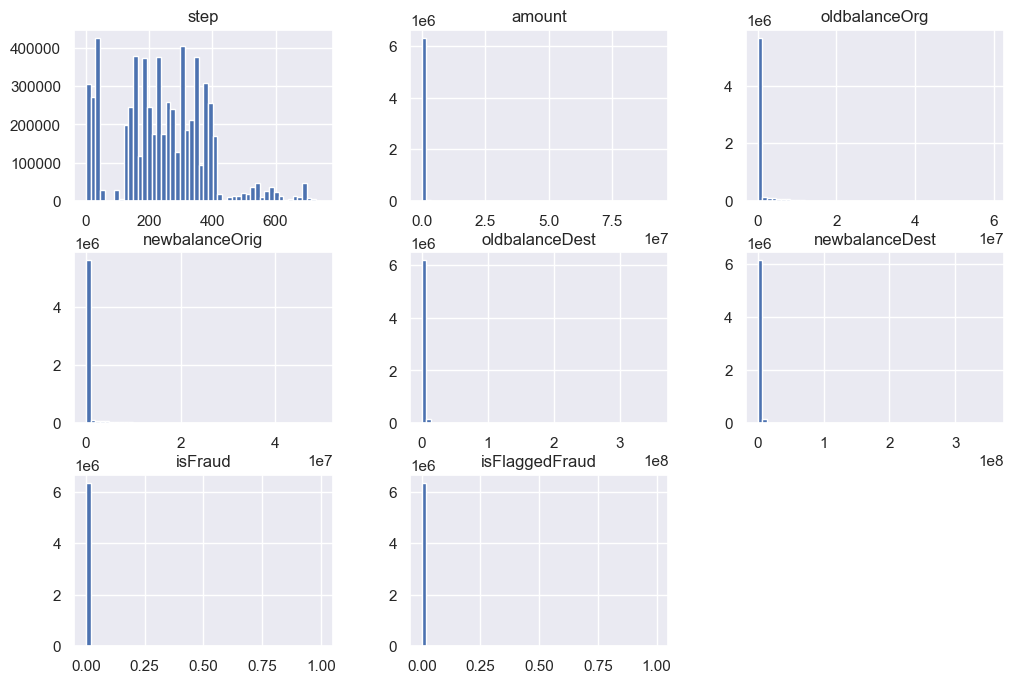

In [23]:
ax = df.hist(bins=50, figsize=(12, 8))
plt.yscale('log')
plt.show()

Só os steps podm ser vistos com histograma. amount pode ser visto com boxplot.testando outros

<Axes: xlabel='step', ylabel='Count'>

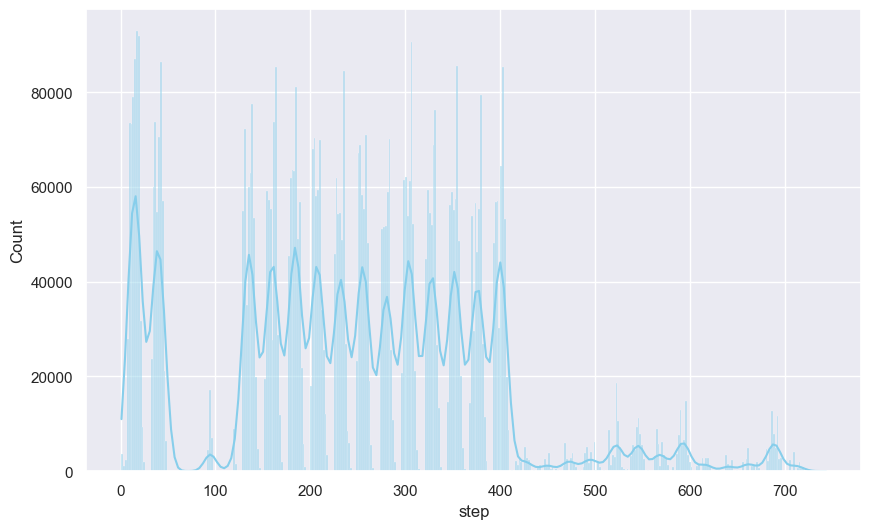

In [25]:
sns.histplot(data=df, x="step", kde=True, color = 'skyblue')

<Axes: >

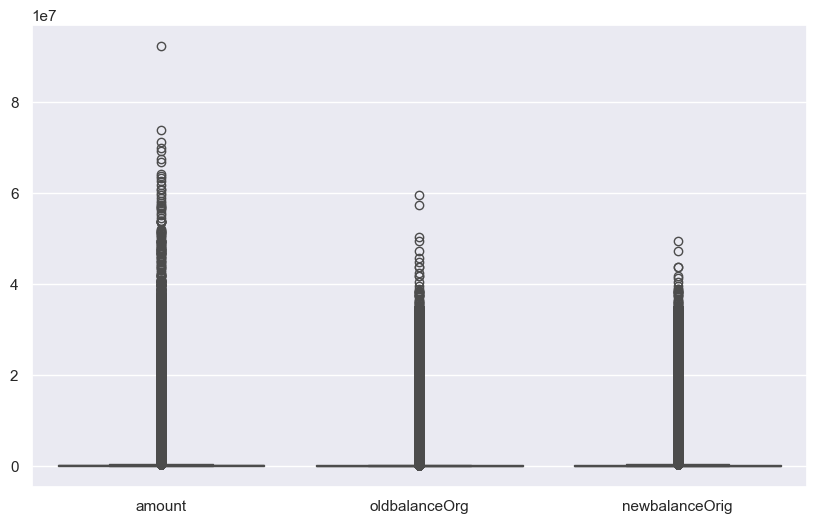

In [26]:
sns.boxplot(data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig']],color = 'skyblue', showfliers=True)

<Axes: >

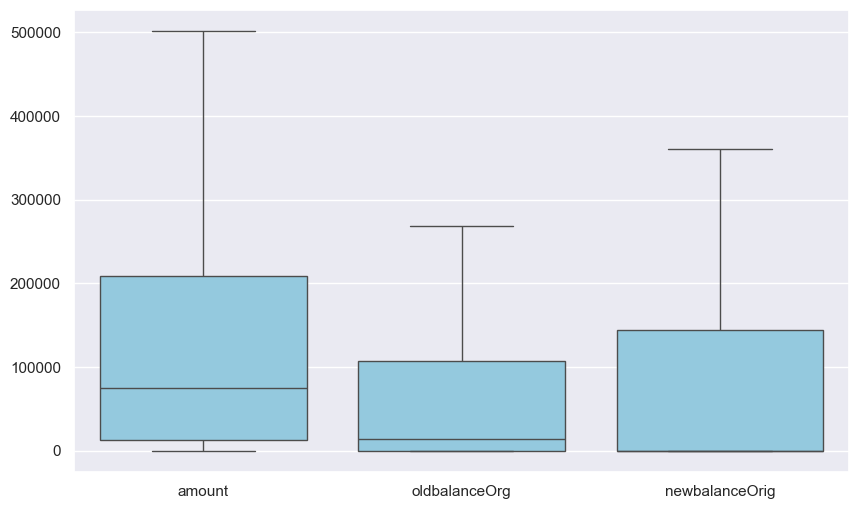

In [27]:
sns.boxplot(data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig']],color = 'skyblue', showfliers=False)

<Axes: >

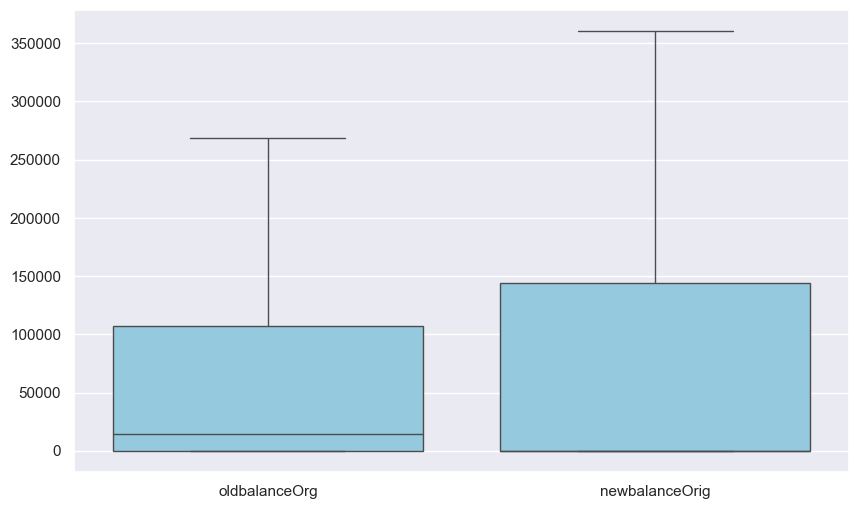

In [28]:
sns.boxplot(data=df[['oldbalanceOrg', 'newbalanceOrig']],color = 'skyblue', showfliers=False)

<Axes: >

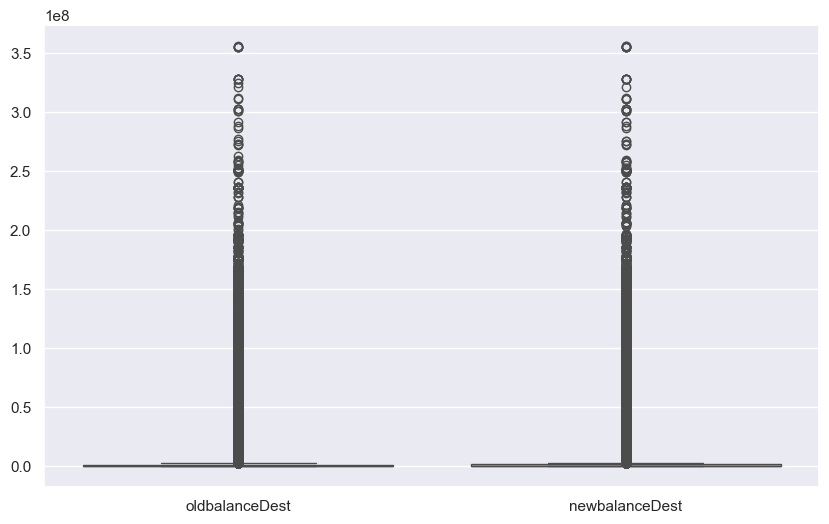

In [29]:
sns.boxplot(data=df[['oldbalanceDest', 'newbalanceDest']],color = 'skyblue', showfliers=True)

<Axes: >

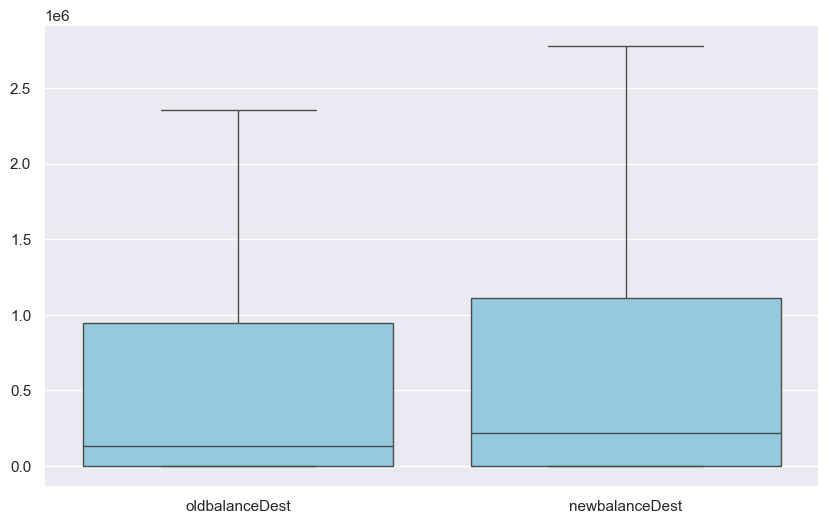

In [30]:
sns.boxplot(data=df[['oldbalanceDest', 'newbalanceDest']],color = 'skyblue', showfliers=False)

### Categorical Features

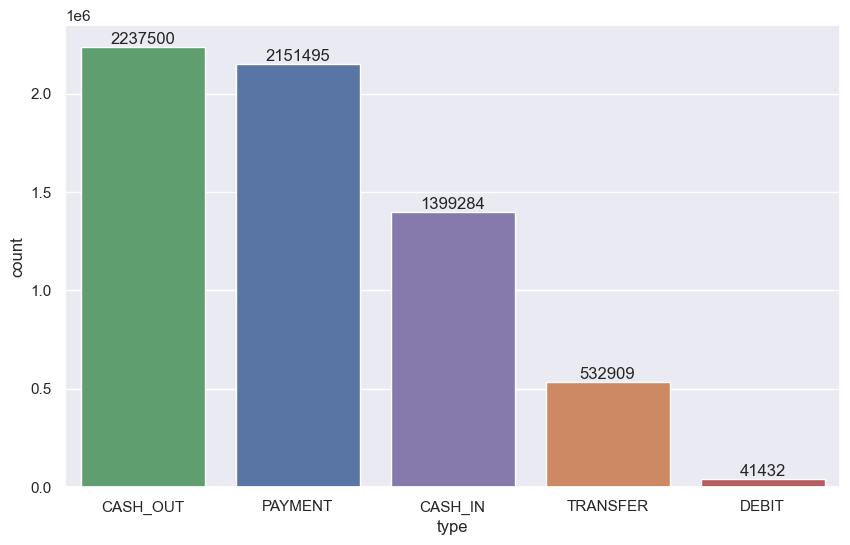

In [32]:
ax = sns.countplot(df, x="type", order=df['type'].value_counts().index, hue = 'type')#, color = 'skyblue')
for i in range(len(ax.containers)): # necessário caso utilizado hue
    ax.bar_label(ax.containers[i], labels=[f'{x.get_height():.0f}' for x in ax.containers[i]])
plt.show()

In [33]:
categorical_features

['type', 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud']

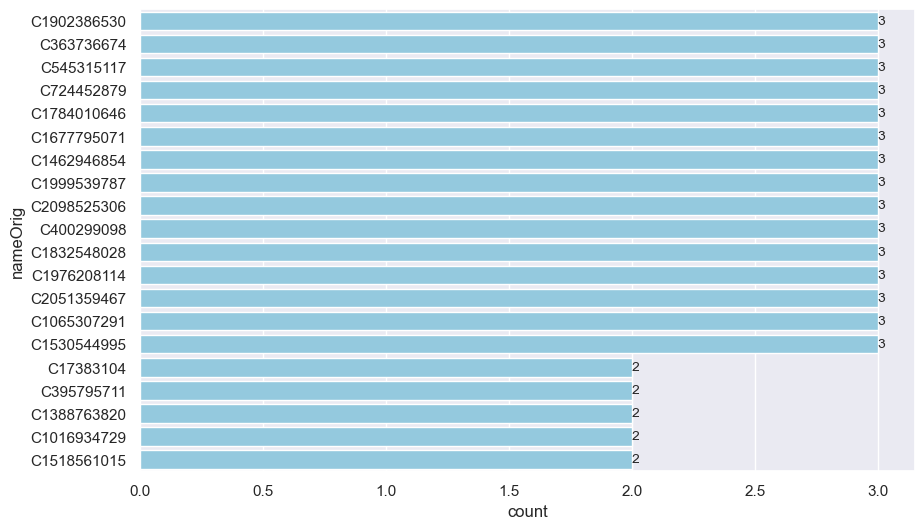

In [34]:
# top 20 nameorg + repetido

ax = sns.countplot(df, y="nameOrig", order=df['nameOrig'].value_counts().index[:20], color = 'skyblue')
ax.bar_label(ax.containers[0], fontsize=10);
plt.show()

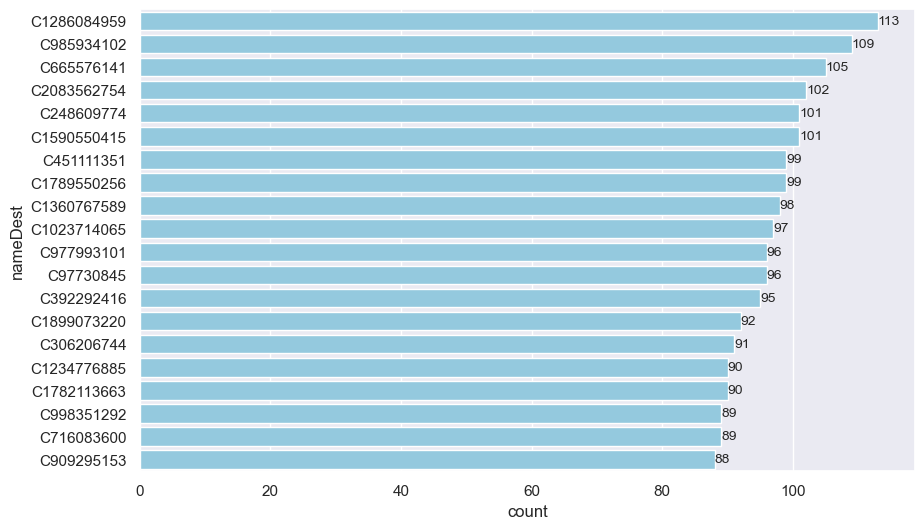

In [35]:
# top 20 namedest + repetido

ax = sns.countplot(df, y="nameDest", order=df['nameDest'].value_counts().index[:20], color = 'skyblue')
ax.bar_label(ax.containers[0], fontsize=10);
plt.show()

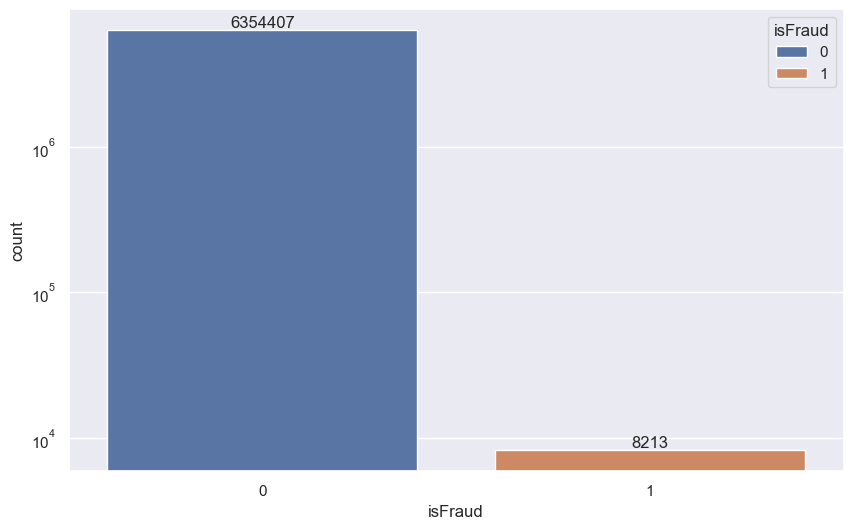

In [36]:
# pie chart e barplot de isFraud

ax = sns.countplot(df, x="isFraud", hue = 'isFraud')
for i in range(len(ax.containers)): # necessário caso utilizado hue
    ax.bar_label(ax.containers[i], labels=[f'{x.get_height():.0f}' for x in ax.containers[i]])
plt.yscale('log')
plt.show()

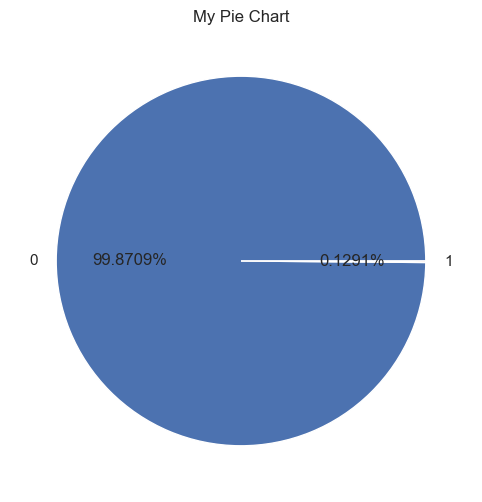

In [37]:
plt.pie(x = df['isFraud'].value_counts(), labels = df['isFraud'].value_counts().index, autopct='%1.4f%%')
plt.title('My Pie Chart')
plt.show()

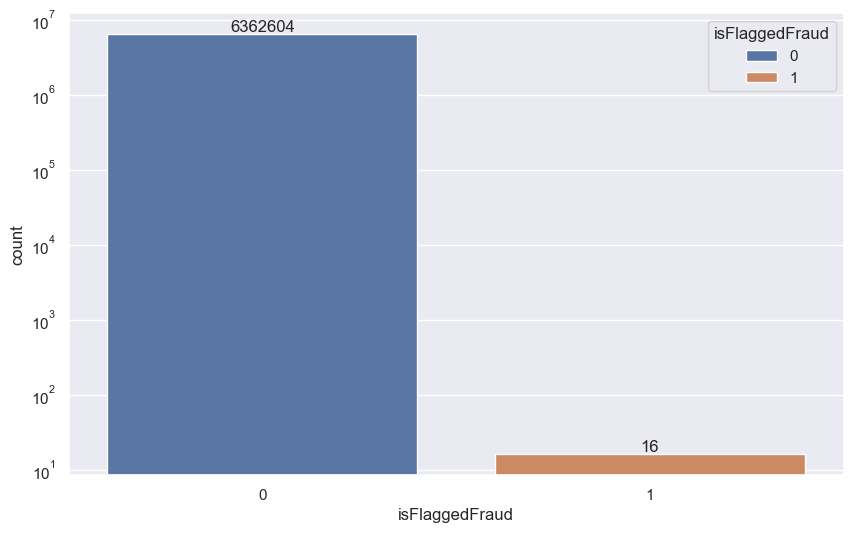

In [38]:
# pie chart e barplot de isFlaggedFraud
ax = sns.countplot(df, x="isFlaggedFraud", hue = 'isFlaggedFraud')
for i in range(len(ax.containers)): # necessário caso utilizado hue
    ax.bar_label(ax.containers[i], labels=[f'{x.get_height():.0f}' for x in ax.containers[i]])
plt.yscale('log')
plt.show()

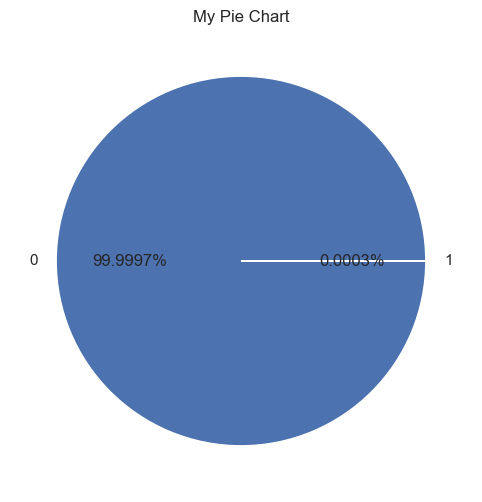

In [39]:
plt.pie(x = df['isFlaggedFraud'].value_counts(), labels = df['isFlaggedFraud'].value_counts().index, autopct='%1.4f%%')
plt.title('My Pie Chart')
plt.show()

## Fraud Analysis (ajustar esse gráfico e plotar toods so gráficos com o padrão da fraude pra ver como fica.)

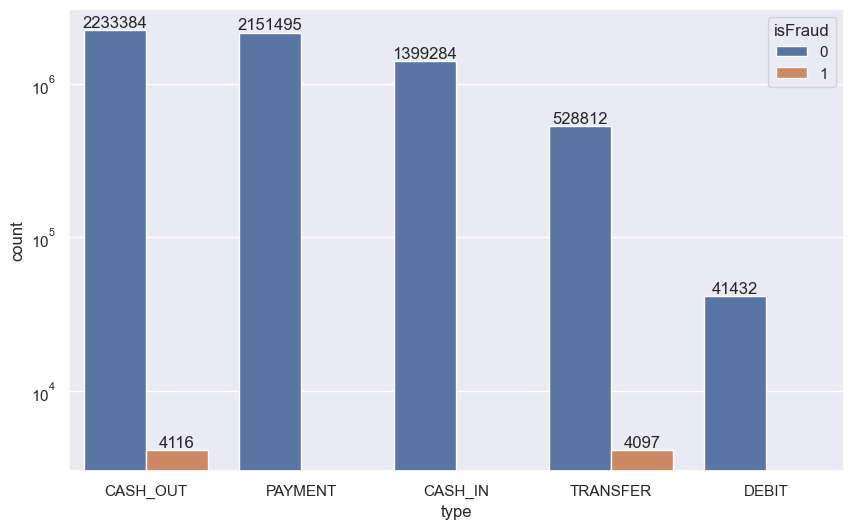

In [41]:
ax = sns.countplot(df, x="type", order=df['type'].value_counts().index, hue = 'isFraud')

for i in range(len(ax.containers)): # necessário caso utilizado hue
    ax.bar_label(ax.containers[i], labels=[f'{x.get_height():.0f}' for x in ax.containers[i]])

plt.yscale('log')
plt.show()

In [90]:
4097/528812 *100

0.7747554896636233

In [92]:
4116/2233384 *100

0.18429432645707142

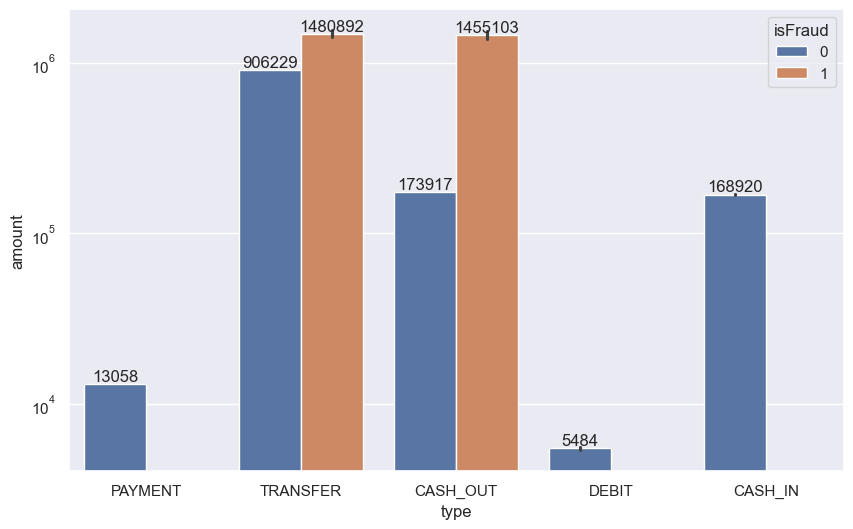

In [100]:
ax = sns.barplot(data = df, x="type", y = "amount", hue = 'isFraud')

for i in range(len(ax.containers)): # necessário caso utilizado hue
    ax.bar_label(ax.containers[i], labels=[f'{x.get_height():.0f}' for x in ax.containers[i]])

plt.yscale('log')
plt.show()

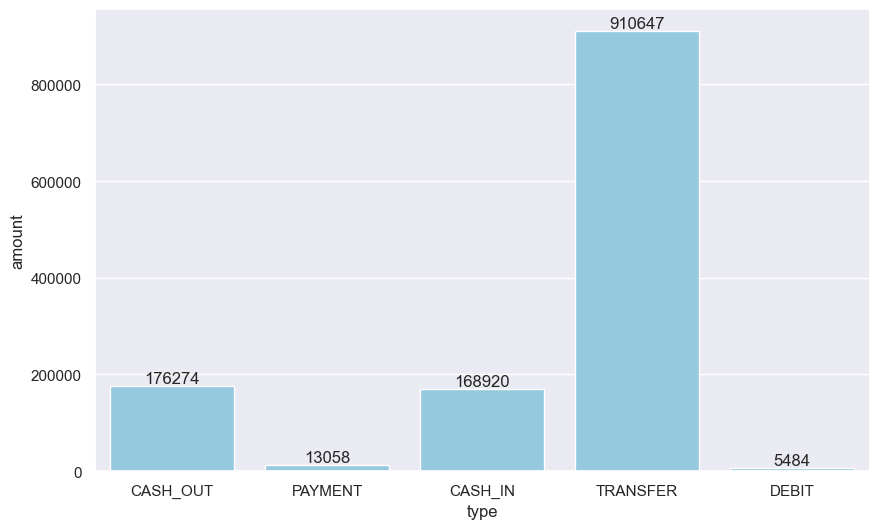

In [111]:
ax = sns.barplot(data = df, x="type", y = "amount", errorbar=None, order=df['type'].value_counts().index, color = 'skyblue')

for i in range(len(ax.containers)): # necessário caso utilizado hue
    ax.bar_label(ax.containers[i], labels=[f'{x.get_height():.0f}' for x in ax.containers[i]])

#plt.yscale('log')
plt.show()

In [131]:
14558103 + 1480892

16038995

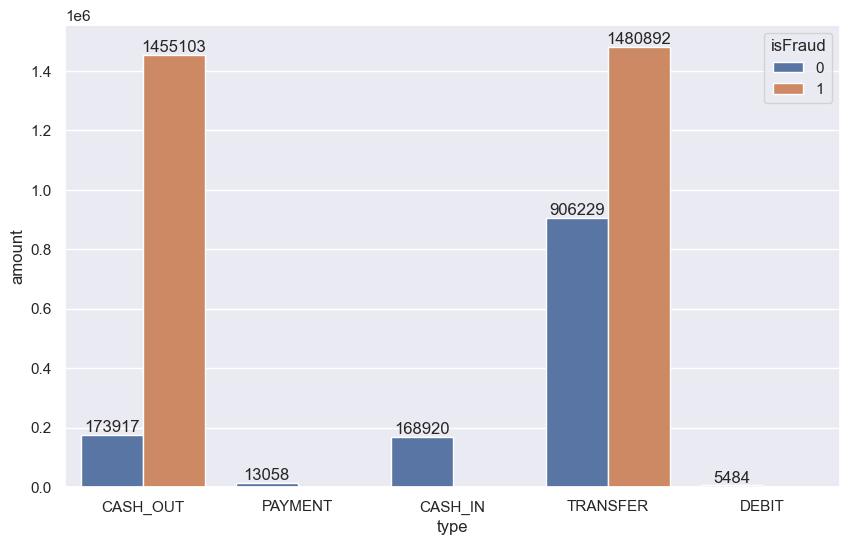

In [103]:
ax = sns.barplot(data = df, x="type", y = "amount", hue = 'isFraud', errorbar=None, order=df['type'].value_counts().index)

for i in range(len(ax.containers)): # necessário caso utilizado hue
    ax.bar_label(ax.containers[i], labels=[f'{x.get_height():.0f}' for x in ax.containers[i]])

#plt.yscale('log')
plt.show()

In [171]:
df[df['type'].isin(['CASH_OUT','TRANSFER'])]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [179]:
df_fraud_type = df[df['type'].isin(['CASH_OUT','TRANSFER'])].groupby(['type','isFraud']).agg(
    amount_sum = ('amount', 'sum'), 
    count_fraud = ('isFraud', 'count')
)

df_fraud_type.reset_index()

,type,isFraud,amount_sum,count_fraud
0,CASH_OUT,0,3.884238e+11,2233384
1,CASH_OUT,1,5.989202e+09,4116
2,TRANSFER,0,4.792248e+11,528812
3,TRANSFER,1,6.067213e+09,4097


In [181]:
4116+4097

8213

In [107]:
df_fraud = df.groupby(['isFraud']).agg(amount_sum = ('amount', 'sum'), count_fraud = ('isFraud', 'count'))
df_fraud

,amount_sum,count_fraud
isFraud,,
0,1.132337e+12,6354407
1,1.205642e+10,8213


In [145]:
df_fraud['amount_sum'][1]/df_fraud['amount_sum'][0] *100

1.0647378332794046

In [133]:
amount_fraud = df[df['isFraud']==1]['amount'].sum()

In [135]:
amount_nofraud = df[df['isFraud']==0]['amount'].sum()

In [141]:
amount_fraud/amount_nofraud *100

1.0647378332794033

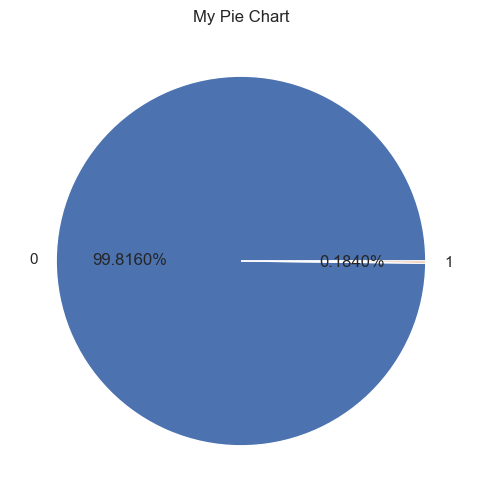

In [86]:
DATA_TEST2 = df[df['type'].isin(['CASH_OUT'])]

plt.pie(data = DATA_TEST2, 
        x = DATA_TEST2['isFraud'].value_counts(), 
        labels = DATA_TEST2['isFraud'].value_counts().index, 
        autopct='%1.4f%%'
       )
plt.title('My Pie Chart')
plt.show()

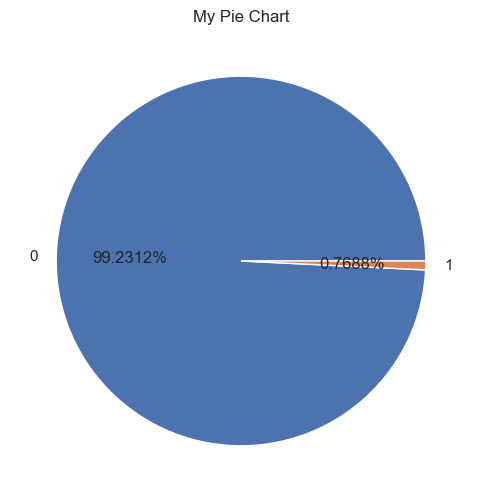

In [84]:
DATA_TEST = df[df['type'].isin(['TRANSFER'])]

plt.pie(data = DATA_TEST, 
        x = DATA_TEST['isFraud'].value_counts(), 
        labels = DATA_TEST['isFraud'].value_counts().index, 
        autopct='%1.4f%%'
       )
plt.title('My Pie Chart')
plt.show()

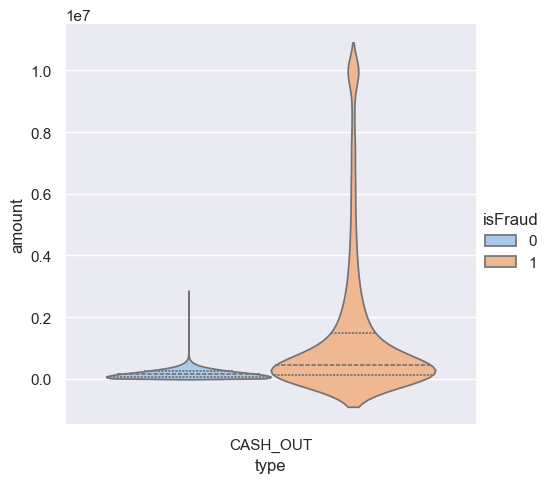

In [45]:
sns.catplot(
    data=df[df['type'].isin(['CASH_OUT'])], y="amount", x="type", hue="isFraud",
    kind="violin", palette="pastel", split=False, inner = 'quartiles'
)


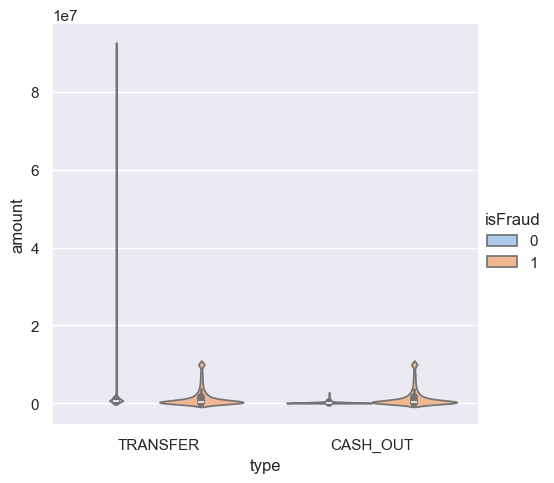

In [46]:
sns.catplot(
    data=df[df['type'].isin(['CASH_OUT','TRANSFER'])], y="amount", x="type", hue="isFraud",
    kind="violin", palette="pastel",
)
#plt.xscale('log')

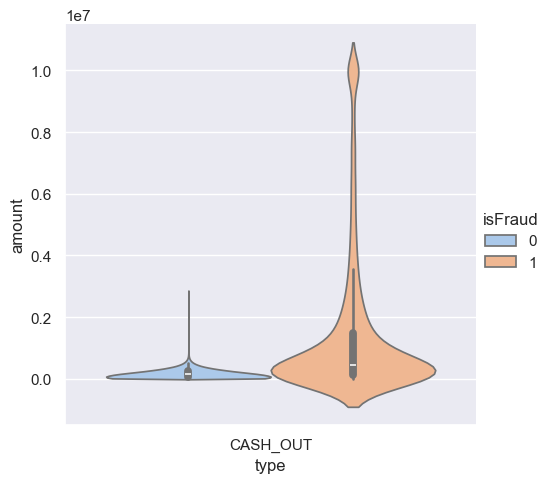

In [47]:
sns.catplot(
    data=df[df['type'].isin(['CASH_OUT'])], y="amount", x="type", hue="isFraud",
    kind="violin", palette="pastel",
)
#plt.xscale('log')

<Axes: xlabel='type', ylabel='amount'>

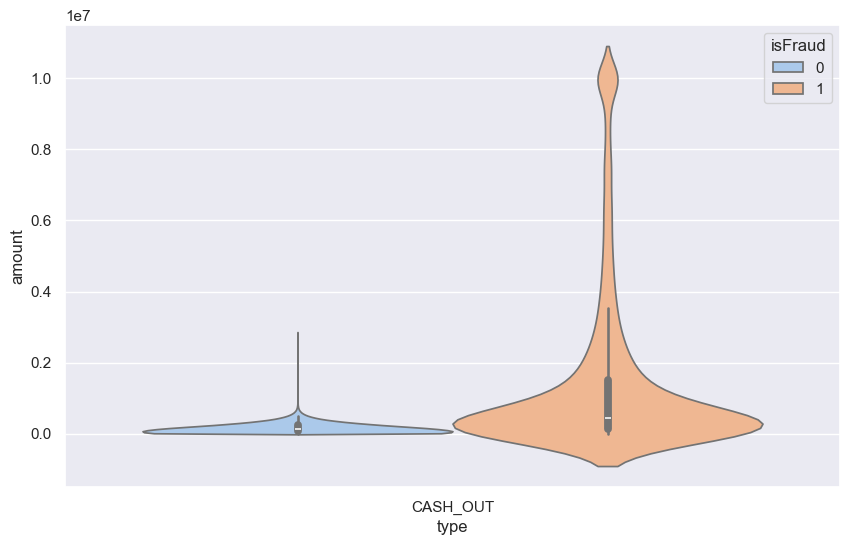

In [48]:
sns.violinplot(
    data=df[df['type'].isin(['CASH_OUT'])], y="amount", x="type", hue="isFraud",
    palette="pastel",
)

<Axes: xlabel='type', ylabel='amount'>

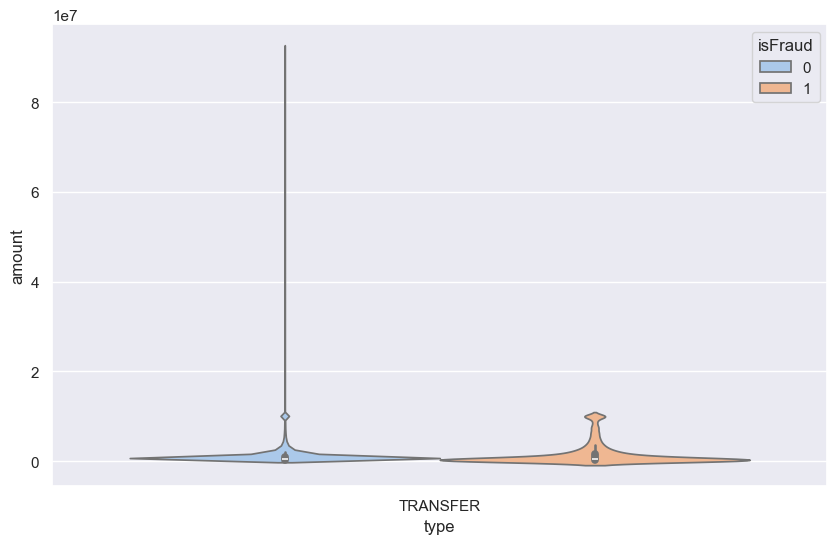

In [49]:
sns.violinplot(
    data=df[df['type'].isin(['TRANSFER'])], y="amount", x="type", hue="isFraud",
    palette="pastel",
)

<Axes: xlabel='type', ylabel='amount'>

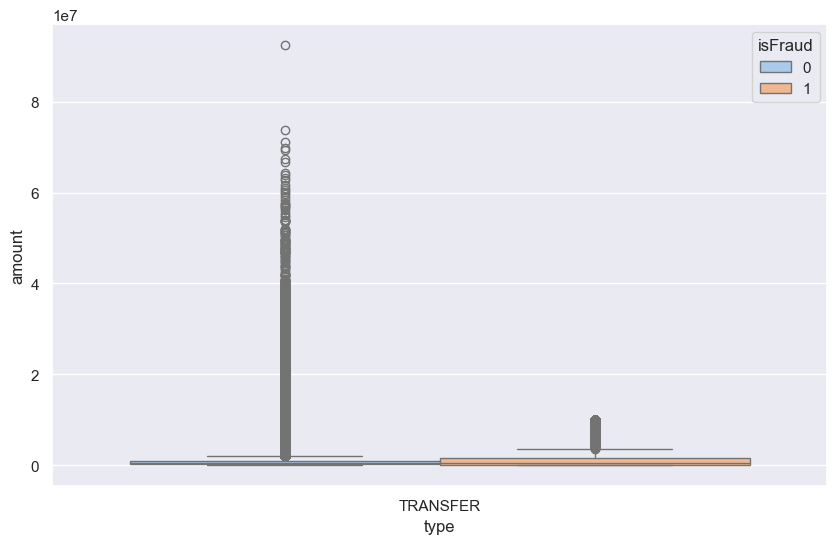

In [50]:
sns.boxplot(
    data=df[df['type'].isin(['TRANSFER'])], y="amount", x="type", hue="isFraud",
    palette="pastel",
)

In [51]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
sns.violinplot(
    data=df[df['type'].isin(['TRANSFER'])], y="amount", x="type", hue="isFraud",
    palette="pastel", showfliers=False
)